## Training Lienar Model
이전 Post에서는 단순하게 Sklearn에서 Model들을 가지고 Fitting을 하였다.  
이번 Post에서는 단순하게 Model만 가지고 Fitting하는 것이 아닌 다양한 학습 방법및 원하는 방식으로 Parameter조절, 또 Model의 성능을 향상시키기 위한 방법에 대해서 알아본다.

## Setup
실제 Project를 진행하기 앞서 사용하고자 하는 Library확인 및 원하는 Version(Python 언어 특성상 Version에 많이 의존하게 된다.)이 설치되어있는지 확인하는 작업이다.  
또한, 자주 사용하게 될 Function이나, Directory를 지정하기도 한다.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear Regression
선형 회귀를 해결하는 방법으로는 <a href="https://wjddyd66.github.io/dl/NeuralNetwork-(3)-Optimazation/">NormalEquation과 SGD와 같이 Optimizer를 활용하여 Function Approximation을 하는 방법</a>이 있다. (자세한 내용은 이번 Post를 벗어나므로 링크 참조)  
아래 Code는 <span>$y=4+3*X+GausianNoise$</span>의 Data를 생성하고 확인하는 과정이다.
- <code>np.random.rand(m,n)</code>: m,n 크기의 0~1 표준정규 분포
- <code>np.random.randn(100,1)</code>: m,n 크기의 평균0, 분산1의 가우시안 표준정규 분포

Saving figure generated_data_plot


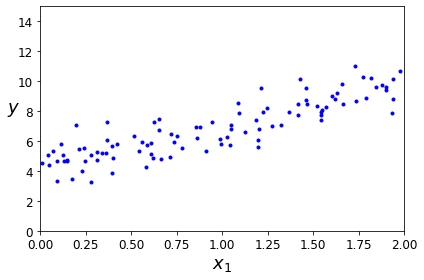

In [2]:
# Create Data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Data Visualization
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

### Normal Equation

위에서 우리는 식 <span>$y=4+3*X+GausianNoise$</span>으로서 Dataset을 구축하였다.  

우리는 이러한 실제 Function을 알 수 없고 주어진 X,Y의 Data로서 위의 Function을 예측하여야 한다.  
먼저 우리는 **Model이 Linear Regression형태라고 가정한다면 다음과 같이 식을 쓸 수 있다.**  
<p>$$y = \theta_0+\theta_1*x$$</p>

위의 식에서 우리는 **Normal Equation을 사용**하게 되면 최적의 Parameter <span>$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$</span>라는 것을 알 수 있다. (위의 식이 이해 되지 않으시면 위의 링크를 참조)  

따라서 <span>$\theta_0 = \theta_0*X_0 -> X_0=1$</span>이 되게 되고 이러한 상태에서 NormalEquation을 통해 <span>$\hat{\theta}$</span>를 구하여 나타내면 다음과 같다.

Paramter
𝜃0 = [4.21509616], 𝜃1 = [2.77011339]

Model Prediction
 [[4.21509616]
 [9.75532293]] 

Saving figure linear_model_predictions_plot


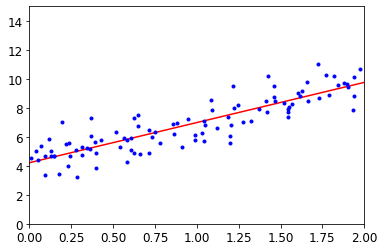

In [3]:
# X_0 + X_1
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('Paramter\n𝜃0 = {}, 𝜃1 = {}'.format(theta_best[0],theta_best[1]))

# Prediction
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
# X =0, 2 -> y=?, 
y_pred = X_new_b.dot(theta_best)
print('\nModel Prediction\n',y_pred,'\n')

# Visualization
save_fig("linear_model_predictions_plot")
plt.plot(X_new, y_pred, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

위의 과정은 sklearn의 Model을 사용하여 구축하면 다음과 같다.

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

print('Paramter\n𝜃0 = {}, 𝜃1 = {}'.format(lin_reg.intercept_, lin_reg.coef_))

Paramter
𝜃0 = [4.21509616], 𝜃1 = [[2.77011339]]


위의 식을 조금만 더 생각해보자.  
위에서 Normal Equation의 결과로 우리는 다음과 같은 식을 얻었다.  
<p>$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$</p>
위의 식을 다음과 같이 변형할 수 있다.  
<p>$$(X^{T}X)^{-1}X^{T}y = X^{-1}(X^{T})^{-1}X^{T}y$$</p>
<p>$$X^{-1}y = X^{+}y$$</p>
<p>$$(X^{+}\text{  :pseudo inverse})$$</p>

In [5]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

<a href="https://wjddyd66.github.io/dl/NeuralNetwork-(3)-Optimazation/">Optimization</a>을 살펴보게 되면, 크게 2가지의 단점이 존재하게 된다.
1. Data의 모든 Input을 알아야 한다.
2. Dimension이 늘어날 수록 계산을 위한 시간 및 메모리가 많이 소용된다.

위와 같은 NormalEquaiton의 단점을 해결하기 위한 optimization의 방법은 Gradient Descent방법이다.

## Linear regression using batch gradient decent

Gradient Descent는 다음과 같이 정의할 수 있다.
- Model: <span>$\hat{y^{(i)}} = \theta^T x^{(i)}$</span>
- LossFunction(Mean Square Error): <span>$\sum_{i=1}^{m}(y^{(i)}-y^{(i)})^2$</span>
- Optimization(Batch Gradient Descent): <span>$\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})x_j^{(i)}$</span>
- Weight Update: <span>$\theta^{*} = \theta -\eta \nabla_{\theta}MSE(\theta) \text{,   }\eta:\text{  Learning Rate}$</span>

In [6]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
hat_y = X_new_b.dot(theta)

print('Paramter: 𝜃0 = {}, 𝜃1 = {}'.format(theta[0], theta[1]))
print('Model Prediction: y1 = {} 𝑦̂1 = {} , y2 = {} 𝑦̂2 = {}'.format(4,hat_y[0],10,hat_y[1]))

Paramter: 𝜃0 = [4.21509616], 𝜃1 = [2.77011339]
Model Prediction: y1 = 4 𝑦̂1 = [4.21509616] , y2 = 10 𝑦̂2 = [9.75532293]


Weight(<span>$\theta$</span>)의 Update가 잘이루워지는 것 알 수 있다.  

**Batch Gradient Descent는 매 Step(iteration)에서 전체 훈련 세트 X에 대해 계산한다.**  
이러한 Batch Gradient Descent의 장점과 단점은 다음과 같다.

**장점**
1. 전체 학습데이터에 대해 한번의 업데이트가 이루어지기 때문에 전체적인 연산횟수가 적다.
2. 전체 데이터에 대해 Gradient를 계산하여 진행하기 때문에, 최적으로의 수렴이 안정적으로 진행된다.

**단점**
1. 한 Step에 모든 학습데이터를 사용하기 때문에 학습이 오래 걸린다.
2. 지역 최적화(Local Optimal)상태가 되면 빠져나오기 힘들다.
3. 모델 파라미터의 업데이터가 이루어지기 전까지 모든 학습데이터에 대해 저장해야 하기 때문에, 많은 메모리가 필요하다.

### Change Learnig Rate

In [7]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


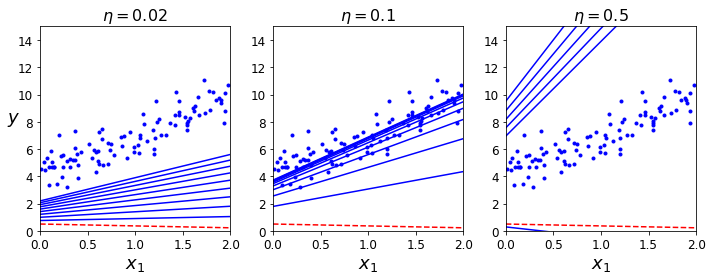

In [8]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

Learning Rate를 변경해가면서 Model이 Fitting되는 결과를 보여주고 있다.

- <span>$\eta = 0.02$</span>: Learning Rate가 작기 때문에, 수렴하기 힘들다.
- <span>$\eta = 0.1$</span>: Learning Rate가 적절하여, Model이 잘 Fitting된다.
- <span>$\eta = 0.5$</span>: LearningRate가 너무 커서 Global Optimum에 수렴하지 못하고 넘어가게 된다.

이러한 Learning Rate는 HyperParameter로서 사용자가 지정하애 한다. 이러한 결과에 따라 Model의 Fitting이 달라지게 되므로, 중요한 Hyperparameter라고 할 수 있다.**

Learning Rate를 지정하는 방법 중 하나로는 Learning Schedule이 있다.  

**Learning Schedule은 다양한 종류가 존재하게 되는데 현재 책에서 진행하는 방법은 처음에는 잘 수렴하지 않았을 것이라고 가정하고 Learning Rate를 크게 설정하고 점차적으로 줄여가는 방법이다.**

현재는 Parmeter별로 Learning Rate를 다르게 하여 진행하거나, Sin, Cos인 등으로 늘렸다 줄였다 하는 방식 등으로 많은 좋은 해결책을 얻기 위하여 연구되고 있는 분야이다.

## Stochastic Gradient

**Stochastic Gradient란 랜덤하게 Data를 Sampling하여 Weight Update하는 것 이다. 랜덤으로 Sampling하므로 Batch Gradient Descent의 장점인 연산횟수가 적은것, 안정적으로 Global Optimum을 찾을 수는 없지만 Local Optimum에 빠질 확률은 낮을 것을 알 수 있다.**

Saving figure sgd_plot


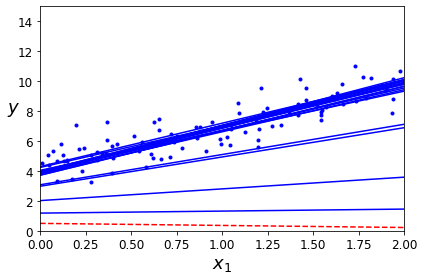

In [9]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [10]:
print('Paramter: 𝜃0 = {}, 𝜃1 = {}'.format(theta[0], theta[1]))

Paramter: 𝜃0 = [4.21076011], 𝜃1 = [2.74856079]


Scikit Learn에서 제공하는 SGDRegressor로서 Model을 Fitting하여도 다음과 같은 결과를 얻을 수 있다.

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print('Paramter: 𝜃0 = {}, 𝜃1 = {}'.format(sgd_reg.intercept_, sgd_reg.coef_))

Paramter: 𝜃0 = [4.24365286], 𝜃1 = [2.8250878]


## Mini-batch gradient descent
SGD + BGD를 합친 방법이다.  
**가장 많이 사용하는 방법 중 하나이므로, Data를 적당한 크기의 Batch로서 SGD를 적용하는 방법이다. 즉, SGD-1 sample, BGD-All sample, MBD-Batch sample인 것 이다.**

SGD의 장점(Local Optimum에 빠질 확률이 적다.)과 BGD(수렴 속도가 빠르며 안정적이다.)의 장점을 같이 사용하는 방법이다.

In [12]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
print('Paramter: 𝜃0 = {}, 𝜃1 = {}'.format(theta[0], theta[1]))

Paramter: 𝜃0 = [4.25214635], 𝜃1 = [2.7896408]


## Compare BGD vs SGD vs MGD
- BGD: 안정적으로 수렴하고, Iteration의 수가 적다.
- SGD: 안정적으로 수렴하지 않지만, Local Optimum에서 빠져나올 수 있다.
- MGD: BGD + SGD

아래의 Model은 Complexity가 적기 때문에, 전부 Global Optimum에 수렴한다.

Saving figure gradient_descent_paths_plot


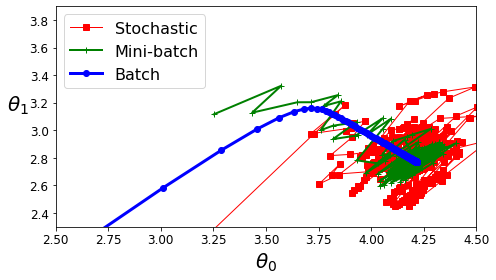

In [13]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial regression

Polynomial regression이란 다차원으로서 Data를 변형하여 Prediction하는 방법이다.

<a href="https://wjddyd66.github.io/machine%20learning/Theory(6)Training-Testing-and-Regularization/">Training, Testing and Regularization</a>를 살펴보면, Data를 Fitting하기 위하여 가장 쉬운 방법은 Model의 Complexity를 늘리는 방법이다.

Model의 Complexity를 늘리기 위해서는 <span>$\theta$</span>의 개수를 증가시키는 것 이고, 따라서 다음과 같이 Polynomial Regression Model을 구성한다.

<p>$$y = \theta_2x^2 + \theta_1x + \theta_0$$</p>

**Dataset**

Saving figure quadratic_data_plot


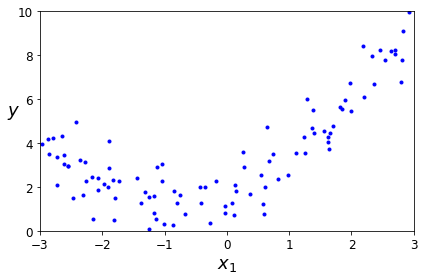

In [14]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">PolynomialFeatures</a>를 활용하여 x -> x,x^2으로서 변형한다.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

Polynomial regression

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

print('Paramter: 𝜃0 = {}, 𝜃1 = {}, 𝜃2 = {}'.format(lin_reg.intercept_[0], lin_reg.coef_[:,0][0], lin_reg.coef_[:,1][0]))
print('Real: 𝜃0 = {}, 𝜃1 = {}, 𝜃2 = {}'.format(2, 1, 0.5))

Paramter: 𝜃0 = 1.7813458120291452, 𝜃1 = 0.9336689322536068, 𝜃2 = 0.5645626336170754
Real: 𝜃0 = 2, 𝜃1 = 1, 𝜃2 = 0.5


Visualization

Saving figure quadratic_predictions_plot


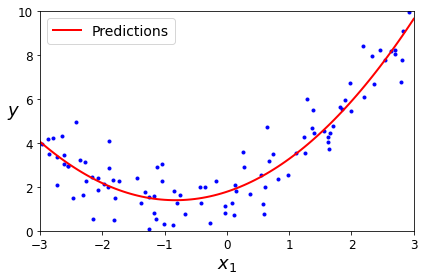

In [17]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

### Change Complexity
위에서 언급하였듯이, Model의 Complexity가 증가함에 따라서 Model의 Bias가 줄고, Variance가 증가함에 따라서 Overfitting이 발생하게 된다.

아래 그림은 Model의 Complexity(Num of wiehgt)를 1,2,300으로 늘려가면서 확인하였다.

Complexity가 증가됨에 따라서 Trainning Data에 대한 Prediction은 점점 증가하지만(Bias는 감소), Test Data에 대한 Prediction이 감소될 것 이다.(Variance가 증가) => Overfitting

**참조**  
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>: z = (x-u)/s => Z-Normalization
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a>: 여러 단계를 를 순차적으로 실행

Saving figure high_degree_polynomials_plot


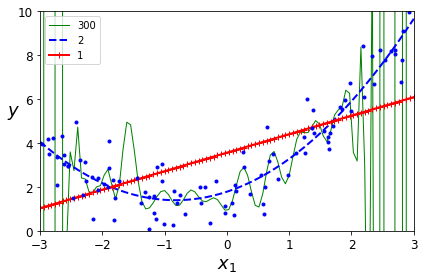

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)


for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

위의 결과로는 Trainning Data에 대한, Model Fitting의 결과이다.

따라서, Variance를 측정하기 위하여 Validation Dataset을 사용하여 Complexity에 따른 Loss는 다음과 같다.

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Model Complexity 1 => Linear Regression

Saving figure underfitting_learning_curves_plot


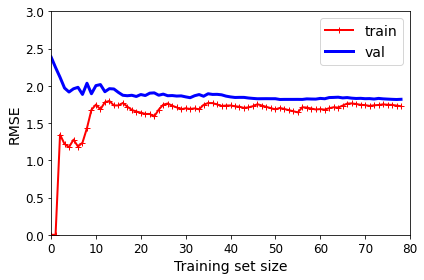

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Model Complexity 10 => Polynomial Regression

Saving figure learning_curves_plot


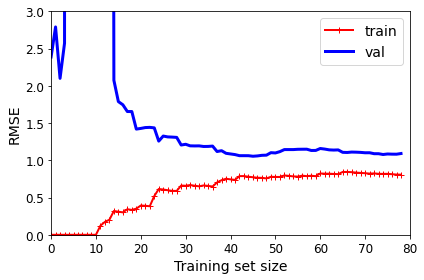

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

**예상한 결과대로 Complexity를 높일 수록, Trainning Loss(Bias)는 줄게 되었으나, Train과 Val의 Loss의 차이(Variance)는 증가하게 된다. => Bias-Variance Trade-off**

## Regularization

Model의 Complexity를 결정하기 위하여 Weight의 개수를 정하는 것은 위에서 Learning Rate와 마찬가지로 Hyperparameter로서 사용자가 정해야 하는 문제이다.  

이러한 문제를 해결하기 위하여, **대부분 Model의 Complexity를 어느정도 유지 + Overfitting 방지 방법**의 방법을 사용하게 된다.  

Overfitting을 피하기 위한 방법 중 가장 대표적인 것이 <a href="https://wjddyd66.github.io/machine%20learning/Theory(6)Training-Testing-and-Regularization/#65-defination-of-regularization">Regularization</a>이다.

### Ridge regularization

**Ridge Regularization = L2 Regularization**  
<span>$E(w) = \frac{1}{2}\sum_{n=0}^{N}(train_n - g(x_n,w))^2 + \frac{\lambda}{2}||w||^2$</span>

**위의 링크를 참조하게 되면, L2 Regularization은 Weight가 Gaussian Distribution이라는 Proior Knowledge를 적용하는 것이고, 앞의 <span>$\lambda$</span>가 커질수록 Weight가 더욱더 Gaussian Distribution형태가 될 것이고, Weight가 0값에 가까워지는 결과를 얻게 된다.**

Saving figure ridge_regression_plot


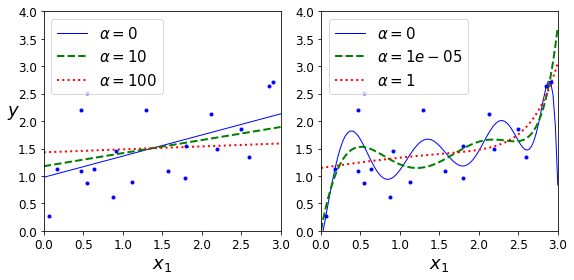

In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# Ridge regression
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

위의 결과는 Model의 Complexity 1, 10으로서 나누고 각각의 RidgeRegression의 <span>$\lambda$</span>값을 변형해 가면서, Model의 Fitting의 결과를 살펴본 것 이다.

<span>$\lambda$</span>값이 커지면 커질수록 weight regularization이 강해져서 Model의 Complexity가 작아지는 것을 확인할 수 있다.

### Lasso Regularization
**Lasso Regularization = L1 Regularization**

<span>$E(w) = \frac{1}{2}\sum_{n=0}^{N}(train_n - g(x_n,w))^2 + \lambda||w||$</span>

Lasso Regularization은 Weight의 Distribution이 Laplacian Distribution이라는 Prior Knowledge를 주는 방법이다.

**Ridge Regularization과 목적과 비슷하지만, weight를 0에 가까운 값이 아니라, 0으로서 만들 수 있다는 것이 다른 차이점이다. 비교한 사진을 살펴보면 다음과 같다.**

<img src="https://miro.medium.com/max/602/1*o6H_R3Do1zpch-3MZk_fjQ.png" height="250" width="600">

/root/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827439, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


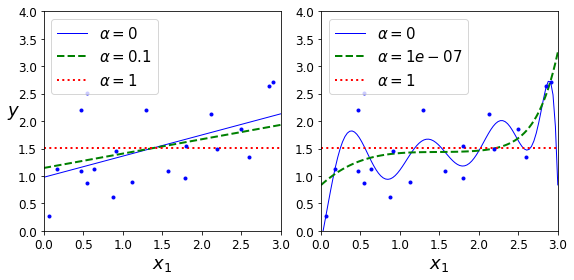

In [26]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

이러한 Ridge Regularization, Lasso Regularization은 scikit learn에서 penalty의 option으로서 간단히 정의할 수 있다.

In [25]:
# Ridge Regularization
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
print('Ridge: ',sgd_reg.predict([[1.5]]))

# Lasso Regularization
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
print('Lasso: ', sgd_reg.predict([[1.5]]))

Ridge:  [1.47012588]
Lasso:  [1.47011206]


### ElasticNet
**ElasticNet = Ridge Regularization + Lasso Regularization**

<span>$E(w) = \frac{1}{2}\sum_{n=0}^{N}(train_n - g(x_n,w))^2 + r\lambda||w|| + \frac{1-r}{2}\lambda||w||^2$</span>

In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
print('Elastic: ', elastic_net.predict([[1.5]]))

Elastic:  [1.54333232]


## Early Stopping
Trainning Dataset으로서 훈련시키는 Model과 Validation Dataset으로서 훈련시키는 Model의 Loss를 측정하면서, 이 Loss의 차이가 지속적으로 증가하는 곳에서 Stopping하는 방법이다.

즉, Model이 Overfitting을 시작하려할 때, Model의 Trainning을 그만하는 것 이다. => Model의 Functional Approximation에서는 부족하지만, Generalization에서는 더 강점을 보여주는 Model이 될 것 이다.

Saving figure early_stopping_plot


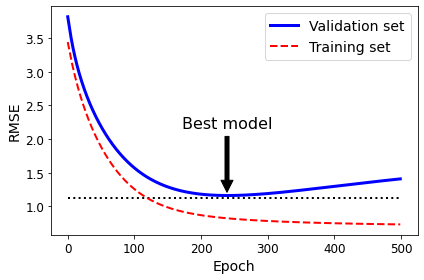

In [31]:
from sklearn.base import clone

# Dataset
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# Split Train, Vla Dataset
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# For Polynomial Model
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGD Regression
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

# Trainning
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# Model with the least Overfitting
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# Visualirtion Model
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

## Logistic Regression

<a href="https://wjddyd66.github.io/machine%20learning/Theory(4)Logistic-Regression/">Logistic Regression</a>을 살펴보게 되면, Linear Regression보다 Logistic Regression으로서 Model을 Fitting하게 되면, Bayes Risk를 줄이면서, 더 성능이 좋아지는 것을 확인할 수 있다. (Weight Update또한, 위의 링크에 나와있습니다.)

**Iris Dataset**

In [33]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

**Model Trainning & Visualization**

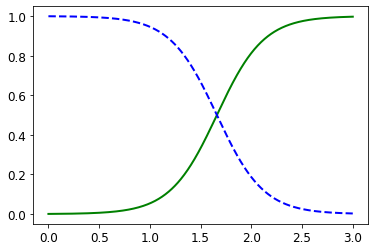

In [35]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

**Decision Boundary**  
Decision Boundary를 살펴보면, Petal width 1.64cm를 기준으로 Iris or Not Iris를 Classification을 하게 된다.

Saving figure logistic_regression_plot


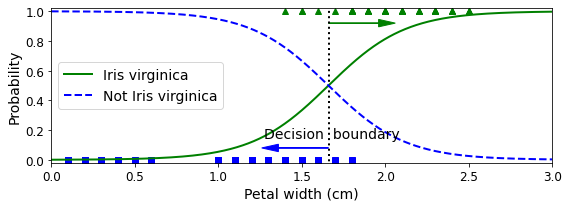

In [36]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [43]:
print('Decision Boundary: ',decision_boundary)
print('Model Prediction: {} -> {}, {} -> {}'.format(1.7, log_reg.predict([[1.7]])[0], 1.5, log_reg.predict([[1.5]])[0]))

Decision Boundary:  [1.66066066]
Model Prediction: 1.7 -> 1, 1.5 -> 0


**Decision Boundary Visualization**  

실제 Decision Boundary에 대하여 Visualization의 결과를 보여주게 된다.  
실제 Logistic Regression의 Model은 다음과 같다.
<p>$$\sigma(\theta_0*\text{Petal width} + \theta_1*\text{Petal length}+\theta_2)\text{,  }\sigma \text{: Sigmoid Function}$$</p>

위의 Logistic Regression을 Logit 변환을 하면 다음과 같다.  
<p>$$\theta_0*\text{Petal width} + \theta_1*\text{Petal length}+\theta_2$$</p>
즉, Petal width, Petal length의 Dimension에서 보았을 경우, Linear 한 Line으로서 Decision을 판단할 수 있다는 것 이다.

아래 결과는 virginica일 확률에 대하여 Line을 보여주는 것 이다.

Saving figure logistic_regression_contour_plot


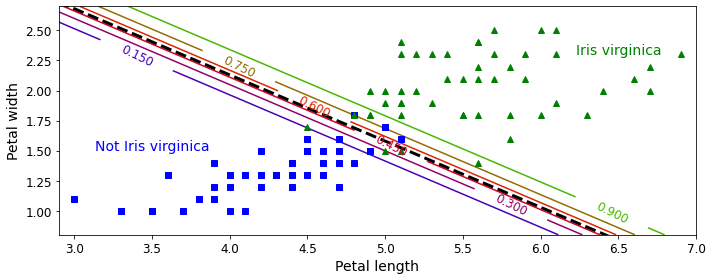

In [46]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

## Softmax Regression
위의 Logistic Regression은 Binary Class를 Classfication하는 Model이다. 위의 문제는 Iris Dataset에 대하여 virginica or not virginica를 Classification하는 예시였다.  
Sigmoid는 0~1의 Output으로서 0.5를 threshold로서 정의하여 Binary Classifiction이 가능하다.

**Softmax Regression은 Binary Classification이 아니라, Multi Class Classification을 하는 Model이다. Sigmoid Function이 아닌 Softmax Function으로서 Model을 만들게 된다.**



Saving figure softmax_regression_contour_plot


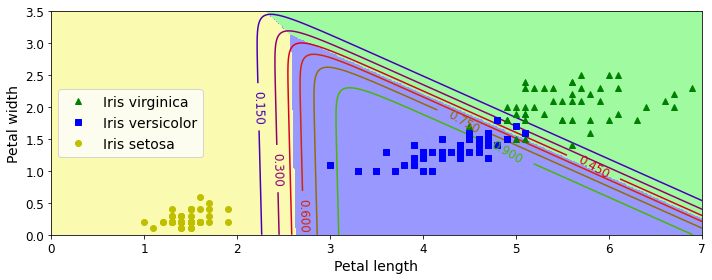

In [47]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()